# Splitting Descent

In [1]:
import torch
from sandbox import SimpleModel, toy_data, experiment_series, eval_series
from pathlib import Path

In [2]:
model_params = (1, 1, 8, 2, 2)

eps = 1e-4
num_kept_neurons = 2
lr=0.005
runs=10

#0: loss: 0.036569684743881226 - size: 649
#1: loss: 0.1867612898349762 - size: 649
#2: loss: 0.19064399600028992 - size: 649
#3: loss: 0.03301732614636421 - size: 649
#4: loss: 0.20209631323814392 - size: 649
#5: loss: 0.335335910320282 - size: 649
#6: loss: 0.18889203667640686 - size: 649
#7: loss: 0.20571760833263397 - size: 649
#8: loss: 0.0589384026825428 - size: 649
#9: loss: 0.035182591527700424 - size: 649


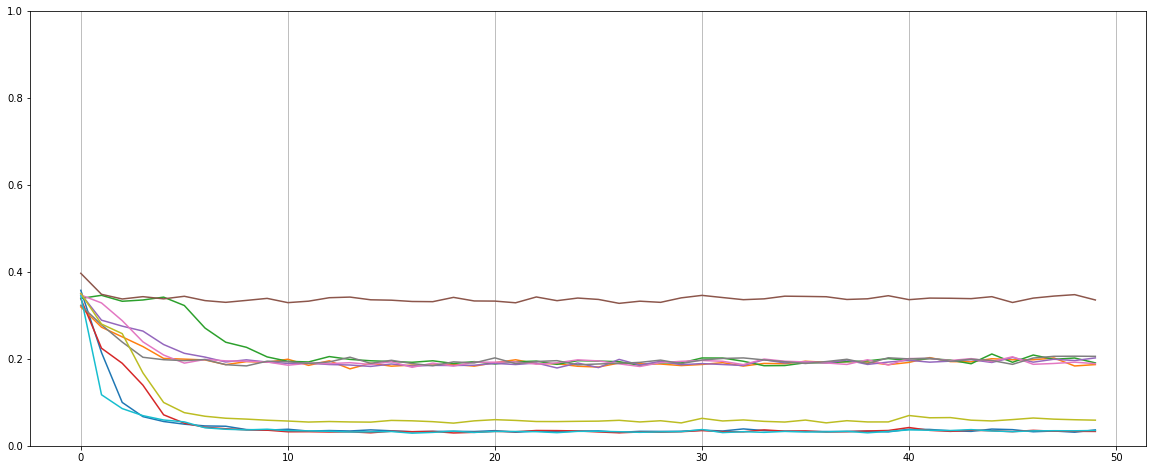

In [3]:
def grow(model):
    model.grow(num_novel=4, eps=eps)
    model.tune_direction()
    model.tune_new_neurons()
    selected = [torch.arange(m.hidden_features) for m in (model.a, model.b)]
    model.degrow(*selected)

series = experiment_series(model_params, runs=runs, grow=grow, lr=lr)

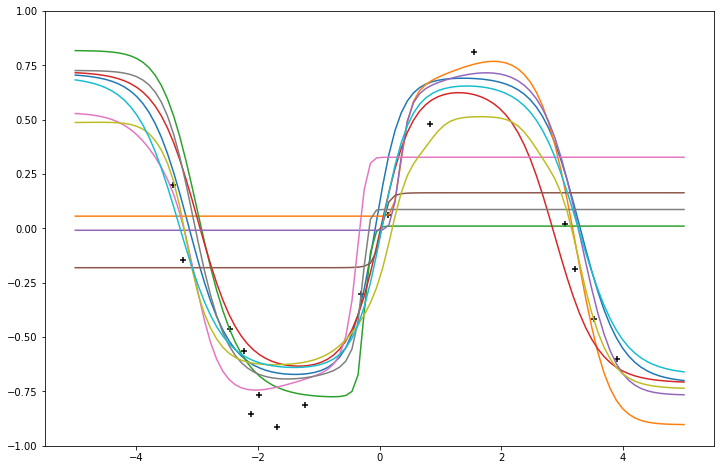

In [4]:
eval_series(series)

In [5]:
d = Path("results")
d.mkdir(parents=True, exist_ok=True)

torch.save(series, d / 'splitting_growth_tuned.pt')